In [1]:
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = YOLO(r"yolov8_n_24aug2023.pt")

In [3]:
im1 = Image.open(r"..\test-data\book_shelf.jpg")

In [4]:
# results = model.predict(source=im1, save=True, show_labels=False, show_conf=False, boxes=False, device='cpu')

In [5]:
results = model.predict(source=im1, save=True, show_labels=False, show_conf=False, boxes=False)


0: 480x640 32 book-spines, 153.6ms
Speed: 4.0ms preprocess, 153.6ms inference, 42.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to e:\Code\shelfscan\runs\segment\predict7


In [6]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 keys: ['boxes', 'masks']
 masks: ultralytics.engine.results.Masks object
 names: {0: 'book-spine'}
 orig_img: array([[[ 46,  67,  98],
         [ 45,  66,  97],
         [ 44,  65,  96],
         ...,
         [ 85, 125, 167],
         [ 91, 131, 173],
         [ 98, 138, 180]],
 
        [[ 46,  67,  98],
         [ 45,  66,  97],
         [ 44,  65,  96],
         ...,
         [ 86, 126, 168],
         [ 91, 131, 173],
         [ 97, 137, 179]],
 
        [[ 44,  65,  96],
         [ 44,  65,  96],
         [ 43,  64,  95],
         ...,
         [ 87, 127, 169],
         [ 91, 131, 173],
         [ 95, 135, 177]],
 
        ...,
 
        [[ 94,  79,  33],
         [ 93,  78,  32],
         [ 89,  76,  30],
         ...,
         [146, 172, 189],
         [146, 172, 189],
         [146, 172, 189]],
 
        [[ 94,  78,  35],
         [ 93,  77,  34],
    

In [7]:
len(results[0].masks.xy)

32

In [8]:
mask_num = 2

In [9]:
results[0].masks.xy[mask_num] # X column and Y column
# appears to be the coordinates of the exterior of the mask
# need to find pixels behind the polygon of the mask

array([[     1896.3,      1058.4],
       [       1890,      1064.7],
       [       1890,        1953],
       [     1902.6,      1965.6],
       [     2022.3,      1965.6],
       [     2028.6,      1959.3],
       [     2034.9,      1959.3],
       [     2034.9,        1953],
       [     2041.2,      1946.7],
       [     2041.2,      1877.4],
       [     2047.5,      1871.1],
       [     2047.5,      1795.5],
       [     2053.8,      1789.2],
       [     2053.8,      1694.7],
       [     2060.1,      1688.4],
       [     2060.1,      1486.8],
       [     2066.4,      1480.5],
       [     2066.4,        1323],
       [     2072.7,      1316.7],
       [     2072.7,      1241.1],
       [       2079,      1234.8],
       [       2079,      1102.5],
       [     2085.3,      1096.2],
       [     2085.3,      1064.7],
       [       2079,      1058.4]], dtype=float32)

In [10]:
np.round(results[0].masks.xy[0]).astype(int)  # X column and Y column array

array([[1569, 1134],
       [1562, 1140],
       [1562, 1682],
       [1569, 1688],
       [1569, 1770],
       [1575, 1777],
       [1575, 1808],
       [1581, 1814],
       [1581, 1846],
       [1588, 1852],
       [1588, 1947],
       [1594, 1953],
       [1632, 1953],
       [1632, 1947],
       [1644, 1934],
       [1644, 1871],
       [1638, 1865],
       [1638, 1814],
       [1632, 1808],
       [1632, 1373],
       [1625, 1367],
       [1625, 1203],
       [1619, 1197],
       [1619, 1159],
       [1613, 1153],
       [1613, 1140],
       [1606, 1140],
       [1600, 1134]])

In [11]:
mask_xy = np.round(results[0].masks.xy[mask_num]).astype(int)

In [12]:
len(mask_xy)

25

In [13]:
bit_mask = np.zeros(im1.size, dtype=int)

In [14]:
im1.size

(4032, 3024)

In [15]:
bit_mask[mask_xy[:, 0], mask_xy[:, 1]] = 1

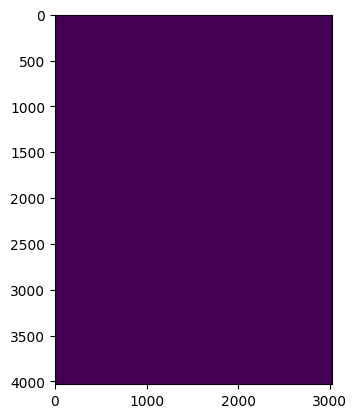

In [16]:
plt.imshow(bit_mask)

In [17]:
from shapely import Polygon
import rasterio.features

In [78]:
mask_polygon = Polygon(np.round(results[0].masks.xy[mask_num]).astype(int))

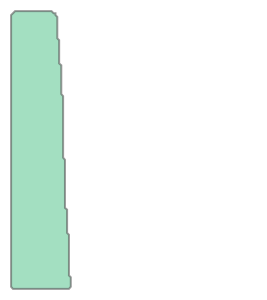

In [79]:
mask_polygon

In [20]:
list(mask_polygon.exterior.coords)

[(1896.0, 1058.0),
 (1890.0, 1065.0),
 (1890.0, 1953.0),
 (1903.0, 1966.0),
 (2022.0, 1966.0),
 (2029.0, 1959.0),
 (2035.0, 1959.0),
 (2035.0, 1953.0),
 (2041.0, 1947.0),
 (2041.0, 1877.0),
 (2047.0, 1871.0),
 (2047.0, 1795.0),
 (2054.0, 1789.0),
 (2054.0, 1695.0),
 (2060.0, 1688.0),
 (2060.0, 1487.0),
 (2066.0, 1480.0),
 (2066.0, 1323.0),
 (2073.0, 1317.0),
 (2073.0, 1241.0),
 (2079.0, 1235.0),
 (2079.0, 1102.0),
 (2085.0, 1096.0),
 (2085.0, 1065.0),
 (2079.0, 1058.0),
 (1896.0, 1058.0)]

In [21]:
im1.width

4032

In [22]:
im1.size

(4032, 3024)

In [23]:
mask_map = rasterio.features.rasterize([mask_polygon], out_shape=(im1.height, im1.width))


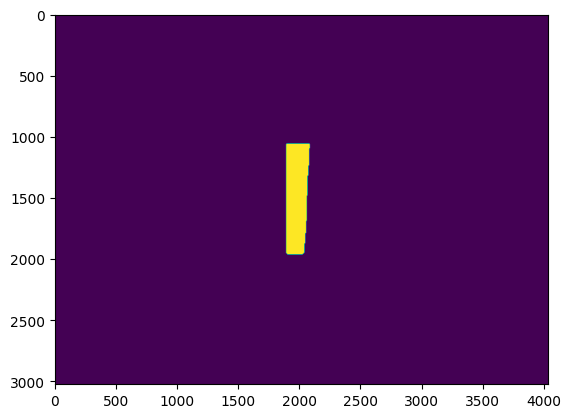

In [24]:
plt.imshow(mask_map)

In [25]:
# take mask_map and apply to input image to filter rgb image down to just the book spine
# apply thresholding technique
# apply ocr

In [26]:
im1_bw = im1.convert("L")

In [27]:
im1_bw.size

(4032, 3024)

In [28]:
masked_image = im1_bw*mask_map

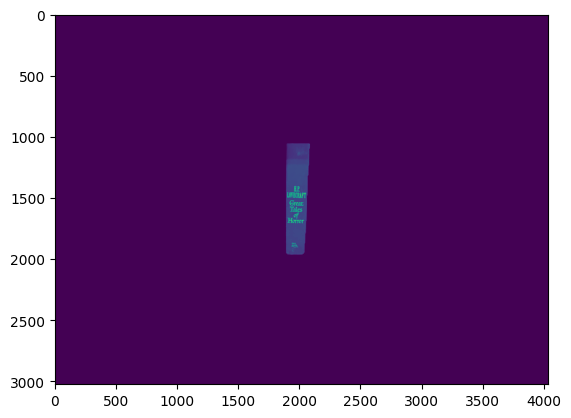

In [29]:
plt.imshow(masked_image)

In [30]:
threshold = 64
masked_image_thresholded = masked_image.copy()
masked_image_thresholded[masked_image_thresholded >= threshold] = 255
masked_image_thresholded[masked_image_thresholded < threshold] = 0

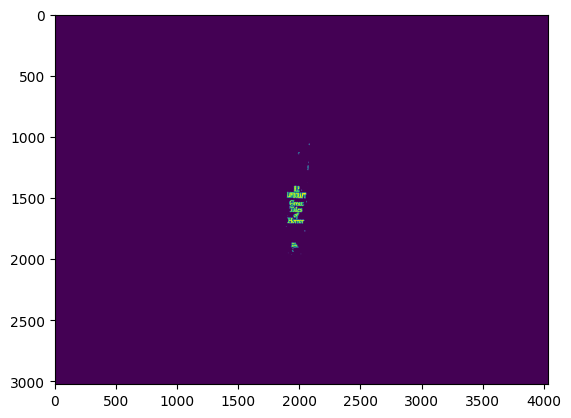

In [31]:
plt.imshow(masked_image_thresholded)

In [32]:
import easyocr

In [33]:
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [34]:
masked_image_thresholded

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [37]:
detection_masked_image = reader.readtext(masked_image)

In [42]:
detection_output = [_[1] for _ in detection_masked_image]
detection_output

['HP', "'LOTBORAPI /", 'Greac', 'Tales', 'of', 'Horror']

In [52]:
bounds_int = [int(_) for _ in mask_polygon.bounds]
min_x, min_y, max_x, max_y = bounds_int

In [53]:
masked_image_bounded = masked_image[min_y:max_y,min_x:max_x]

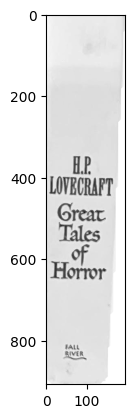

In [64]:
plt.imshow(masked_image_bounded, cmap='Greys')

In [55]:
detection_masked_image_bounded = reader.readtext(masked_image_bounded)

In [56]:
detection_output = [_[1] for _ in detection_masked_image_bounded]
detection_output

['HP', 'LOTBORAPT', 'Greac', 'Tales', 'of', 'Horor', 'IAU']

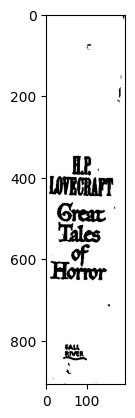

In [71]:
masked_image_bounded_thresh = masked_image_bounded.copy()
threshold = 64
masked_image_bounded_thresh[masked_image_bounded_thresh <= threshold] = 0
masked_image_bounded_thresh[masked_image_bounded_thresh > threshold] = 255
plt.imshow(masked_image_bounded_thresh, cmap='Greys')

In [69]:
detection_masked_image_bounded_thresh = reader.readtext(masked_image_bounded_thresh)
detection_output = [_[1] for _ in detection_masked_image_bounded_thresh]
detection_output

['BP', 'LOTBCRApi', 'Sales', 'Honor', 'KIv{', 'JAIl']

In [82]:
' '.join([_[1] for _ in detection_masked_image_bounded_thresh])

'BP LOTBCRApi Sales Honor KIv{ JAIl'

# Whole Process in 1 Cell

In [2]:
from PIL import Image
from ultralytics import YOLO
import numpy as np
from shapely import Polygon
import rasterio.features
import easyocr

def get_bookspine_text_from_ocr(ocr_results):
    return ' '.join([_[1] for _ in ocr_results])

def get_polygon_bounds_for_slicing(mask_polygon):
    bounds_int = [int(_) for _ in mask_polygon.bounds] # .bounds returns floats, convert to int for slicing
    min_x, min_y, max_x, max_y = bounds_int
    return  min_x, min_y, max_x, max_y

input_image = Image.open(r"..\test-data\book_shelf.jpg")
model = YOLO(r"yolov8_n_24aug2023.pt")
reader = easyocr.Reader(['en'])

results = model.predict(source=input_image, save=True, show_labels=False, show_conf=False, boxes=False)

# get all book spine masks
books_on_shelf = []
for bookspine_mask in results[0].masks.xy: # list of all masks
# for each spine mask:
    # round values to nearest int and create shapely polygon
    mask_polygon = Polygon(np.round(bookspine_mask).astype(int))
    # rasterize the mask polygon -> np.array() of 1's and 0's corresponding to the mask polygon
    mask_bitmap = rasterio.features.rasterize([mask_polygon], out_shape=(input_image.height, input_image.width))
    # reduce input image to 1 channel (from 3)
    input_image_bw = input_image.convert("L")
    # apply mask_bitmap to image
    input_image_masked = input_image_bw * mask_bitmap
    # get a smaller image of just the bookspine so OCR doesnt take forever scanning nothing
    min_x, min_y, max_x, max_y = get_polygon_bounds_for_slicing(mask_polygon)
    input_image_masked_bounded = input_image_masked[min_y:max_y,min_x:max_x]
    # run the OCR
    bookspine_ocr = reader.readtext(input_image_masked_bounded)
    bookspine_text = get_bookspine_text_from_ocr(bookspine_ocr)
    books_on_shelf.append(bookspine_text)
    

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.

0: 480x640 32 book-spines, 158.9ms
Speed: 3.5ms preprocess, 158.9ms inference, 40.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to e:\Code\shelfscan\runs\segment\predict9


In [3]:
books_on_shelf

['1 L 8',
 '1 2 1 [ 3',
 'HP LOTBORAPT Greac Tales of Horor IAU',
 '8 1',
 '8 I 1 1 1',
 '2 F 0',
 '22 0 1',
 '1 ] TCI 8 ',
 '1 ] 9 {',
 'La 4 ',
 'I 1 6 3 4 9 8 3 8 1 1 3',
 'Yuval Noah Harari 1 Rriel History of Humankind 1',
 'IN MAPS A Ailas Ior Schecl&nd Heme Nanee E Polt Joh W Lewie W U Do C Iooaatt (re Aeca Kcantet 6t Eaene Rd Cacen',
 '1 1 1',
 '1 1 1 Wateea 1',
 '8 5 3',
 '',
 '9 ;',
 '5 2 1',
 '3',
 '1 1 1 8',
 'FET 0 8',
 '2 1 1 1 1',
 'g 9 1 8 8',
 'E 2 3',
 '1{ + { 2',
 'DUNe an',
 '2 : 1',
 '1',
 '1 1 8',
 '1 1 { F',
 '']